In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
from sklearn import metrics

seaborn.set() 

In [28]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('/Users/daisyabbott/Desktop/Pai/p-fraud/datasets/fraudecommerce/Fraud_Data.csv')
df.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [39]:
feature_list = ['age', 'sex', 'class', 'browser','purchase_value', 'purchase_time','signup_time', 'source']
target = 'class'
# Categorical features
cat = ['sex', 'browser', 'source']
# Numeric features
num = ['age', 'purchase_value','purchase_time','signup_time']

In [40]:
temp = df[feature_list]
temp

,age,sex,class,browser,purchase_value,purchase_time,signup_time,source
0,39,M,0,Chrome,34,2015-04-18 02:47:11,2015-02-24 22:55:49,SEO
1,53,F,0,Chrome,16,2015-06-08 01:38:54,2015-06-07 20:39:50,Ads
2,53,M,1,Opera,15,2015-01-01 18:52:45,2015-01-01 18:52:44,SEO
3,41,M,0,Safari,44,2015-05-04 13:54:50,2015-04-28 21:13:25,SEO
4,45,M,0,Safari,39,2015-09-09 18:40:53,2015-07-21 07:09:52,Ads
...,...,...,...,...,...,...,...,...
151107,28,M,1,Chrome,43,2015-03-29 00:30:47,2015-01-27 03:03:34,SEO
151108,32,M,0,Safari,35,2015-05-26 12:24:39,2015-05-15 17:43:29,SEO
151109,26,F,0,IE,40,2015-05-20 07:07:47,2015-03-03 23:07:31,SEO
151110,37,M,0,Chrome,46,2015-09-07 09:34:46,2015-07-09 20:06:07,SEO


In [41]:
temp = temp.dropna()
temp

,age,sex,class,browser,purchase_value,purchase_time,signup_time,source
0,39,M,0,Chrome,34,2015-04-18 02:47:11,2015-02-24 22:55:49,SEO
1,53,F,0,Chrome,16,2015-06-08 01:38:54,2015-06-07 20:39:50,Ads
2,53,M,1,Opera,15,2015-01-01 18:52:45,2015-01-01 18:52:44,SEO
3,41,M,0,Safari,44,2015-05-04 13:54:50,2015-04-28 21:13:25,SEO
4,45,M,0,Safari,39,2015-09-09 18:40:53,2015-07-21 07:09:52,Ads
...,...,...,...,...,...,...,...,...
151107,28,M,1,Chrome,43,2015-03-29 00:30:47,2015-01-27 03:03:34,SEO
151108,32,M,0,Safari,35,2015-05-26 12:24:39,2015-05-15 17:43:29,SEO
151109,26,F,0,IE,40,2015-05-20 07:07:47,2015-03-03 23:07:31,SEO
151110,37,M,0,Chrome,46,2015-09-07 09:34:46,2015-07-09 20:06:07,SEO


In [42]:
# onehot encode
features = temp[cat]
features = pd.get_dummies(features)
features

,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Ads,source_Direct,source_SEO
0,0,1,1,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1
3,0,1,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
151107,0,1,1,0,0,0,0,0,0,1
151108,0,1,0,0,0,0,1,0,0,1
151109,1,0,0,0,1,0,0,0,0,1
151110,0,1,1,0,0,0,0,0,0,1


In [43]:
features['age'] = temp['age']
features

,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Ads,source_Direct,source_SEO,age
0,0,1,1,0,0,0,0,0,0,1,39
1,1,0,1,0,0,0,0,1,0,0,53
2,0,1,0,0,0,1,0,0,0,1,53
3,0,1,0,0,0,0,1,0,0,1,41
4,0,1,0,0,0,0,1,1,0,0,45
...,...,...,...,...,...,...,...,...,...,...,...
151107,0,1,1,0,0,0,0,0,0,1,28
151108,0,1,0,0,0,0,1,0,0,1,32
151109,1,0,0,0,1,0,0,0,0,1,26
151110,0,1,1,0,0,0,0,0,0,1,37


In [44]:
features['class'] = temp['class']
features

,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,source_Ads,source_Direct,source_SEO,age,class
0,0,1,1,0,0,0,0,0,0,1,39,0
1,1,0,1,0,0,0,0,1,0,0,53,0
2,0,1,0,0,0,1,0,0,0,1,53,1
3,0,1,0,0,0,0,1,0,0,1,41,0
4,0,1,0,0,0,0,1,1,0,0,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...
151107,0,1,1,0,0,0,0,0,0,1,28,1
151108,0,1,0,0,0,0,1,0,0,1,32,0
151109,1,0,0,0,1,0,0,0,0,1,26,0
151110,0,1,1,0,0,0,0,0,0,1,37,0


In [45]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['class'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('class', axis = 1)

# Saving feature names for later use
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [46]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25,
                                                                           random_state = 42)

In [47]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (113334, 11)
Training Labels Shape: (113334,)
Testing Features Shape: (37778, 11)
Testing Labels Shape: (37778,)


In [48]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=42)

# fit the model

rfc.fit(train_features, train_labels)

# Predict the Test set results

label_pred = rfc.predict(test_features)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_labels, label_pred)))

Model accuracy score with 10 decision-trees : 0.9060


In [49]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     34215
           1       0.62      0.01      0.02      3563

    accuracy                           0.91     37778
   macro avg       0.76      0.50      0.48     37778
weighted avg       0.88      0.91      0.86     37778



In [50]:
df[df['class'] == 0].shape

(136961, 11)

In [51]:
df[df['class'] == 1].shape

(14151, 11)

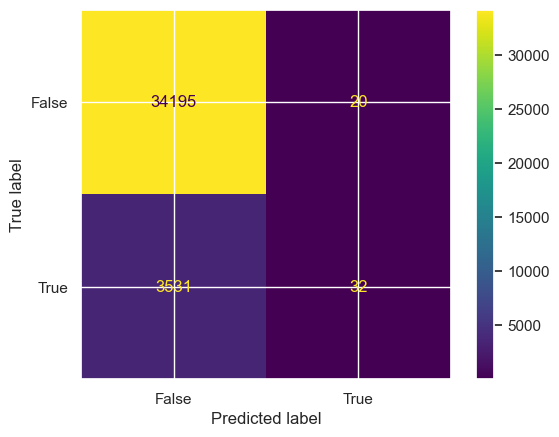

In [52]:
confusion_matrix = metrics.confusion_matrix(test_labels, label_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()